## 1. Librearias necesarias 

In [52]:
# -*- coding: utf-8 -*-
"""
Codigo fuente del proyecto Horer de los amigos del codigo, usado para el Hackaton BBVA 2020
A mitad de la pandemia, ponemos nuestras esperanzas de ganar estas lineas de codigo.
Per Aspera Ad Adstra...
"""
__title__ = 'Horer'
__author__ = 'Los Amigos del Codigo'


#LLibrearias iniciales
import re
import math
import numpy as np
import pandas as pd

#
import xml.etree.ElementTree as et 
from collections import Counter
import itertools
import collections
from scipy.misc import * 

#Procesamiento Natural
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.corpus import stopwords
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import bigrams

#Descargamos algunos objetos que nos ayudaran al analsis de sentimietos
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))

#Graficas
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Heathcliff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Heathcliff\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Funciones principales 

In [148]:
"""clean_data: 
        |---- data: Acepta una serie Pandas
   Quita caracteres que especiales, asi como signuos de admiracion y de puntuacion.             
   Con esto se hace una limpeza de datos general .
   Resultado: Serie pandas con las caracteriscas deseadas 
"""

def clean_data(data):
        
    data=data.apply(lambda x: str(x).lower())
    data=data.str.replace("año", "anio", regex=False)
    data=data.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    data=data.str.replace("!", "", regex=False)
    data=data.str.replace("¡", "", regex=False)
    data=data.str.replace("?", "", regex=False)
    data=data.str.replace("¿", "", regex=False)
    data=data.str.replace(",", "", regex=False)
    data=data.str.replace(".", "", regex=False)
    data=data.str.replace(":)", "", regex=False)
    data=data.str.replace("-", "", regex=False)
    data=data.str.replace("'", "", regex=False)
    data=data.str.replace("\"", " ", regex=False)
    data=data.str.replace(":", "", regex=False)
    data=data.str.replace(":(", "", regex=False)
    data=data.str.replace(r'4', "", regex=False)
    data=data.str.replace(")", " ", regex=False)
    data=data.str.replace("(", " ", regex=False)
    data=data.str.replace(";"," ", regex=False)
    data=data.str.replace(">"," ", regex=False)
    data=data.str.replace("si","", regex=False)
    data=data.str.replace("bbva","", regex=False)
    data=data.str.replace("BBVA","", regex=False)
    data=data.str.replace("Bbva","", regex=False)
    data=data.str.replace("bancomer","", regex=False)
    data=data.str.replace("app","", regex=False)
    data=data.str.replace("mas","", regex=False)    
    data=data.str.replace("@[^s]+", "", regex=True)
    data=data.str.replace("httpS+", "", regex=True)
    data=data.str.replace("https//", "", regex=True)
    data=data.str.replace("buenos", "", regex=False)
    data=data.str.replace("buenas", "", regex=False)
    data=data.str.replace("dias", "", regex=False)
    data=data.str.replace("tardes", "", regex=False)
    data=data.str.replace("hola", "", regex=False)
      
    return data

"""n_gram: 
        |---- data: Acepta una serie Pandas
   Analisis de n-gramamas, con el cual se hace un estudio frecuentista de los datos. 
   Se anade una columna con una metrica bayesiana para darle un mejor enfoque.
   Resutaldo: Una tabla.
"""

def n_gram(data):

    #Guardams los mensajes en una lista
    lista = data.values.tolist()
    
    #Tokenizar 
    tweets_t = [word_tokenize(tweet) for tweet in lista]

    tweets_nsw = [[word for word in tweet_words if not word in stop_words]
                  for tweet_words in tweets_t]
    #Lista sin vacios
    tweets_nsw = list(filter(None, tweets_nsw))
    #Crear bigramas, se varia el dos.
    terms_bigram = [list(ngrams(w_tweet,2)) for w_tweet in tweets_nsw]
    ###
    bigrams = list(itertools.chain(*terms_bigram))
    # Crear el objeto con los bogramas contados
    bigram_counts = collections.Counter(bigrams)
    ##ver 10 primeros bigramas
    bigram_counts.most_common(100)
    ###
    palabras = list(itertools.chain(*tweets_nsw))
    contador=Counter(palabras)

    ###
    c=dict(bigram_counts)
    key=list(c.keys())
    value=list(c.values())
    list1, list2 = zip(*key)
    ##
    c1=dict(contador)
    suma_uni=sum(list(c1.values()))
    ########
    list3=[]
    list4=[]
    ###
    for i in range(0,len(list1)):
       list3.append(c1.get(list1[i]))
    for i in range(0,len(list2)):
       list4.append(c1.get(list2[i]))
    #####

    df1 = pd.DataFrame(list(list1), columns=['palabra1'])
    df1["palabra2"]=pd.DataFrame(list(list2))
    df1["fx"]=pd.DataFrame(list(list3))
    df1["fy"]=pd.DataFrame(list(list4))
    df1["fxy"]=pd.DataFrame(list(value))
    suma_bi=sum(df1["fxy"])
    df1["pfx"]=df1["fx"]/suma_uni
    df1["pfy"]=df1["fy"]/suma_uni
    df1["pfxy"]=df1["fxy"]/suma_bi
    df1["Ixy"]=df1["pfxy"]/(df1["pfx"]*df1["pfy"])
    df1=df1[df1["fxy"]>=5]
    df1["Ixy"]=np.log(df1["Ixy"])
    df1=df1.sort_values('fxy', ascending=False)
    df1.reset_index(drop=True, inplace=True)
    
    return df1

"""Word_Cloud: 
        |---- texto: Acepta ----
   Funcionn que genera una nube de pabra, la cual se integra al dashboard     
   Resutaldo: Nube de palabras.
"""

def Word_Cloud(texto):

    #lista = list(texto)
    #lista = texto.values.tolist()
    lista = texto["texto"].values.tolist()
    ###
    tweets_t = [word_tokenize(tweet) for tweet in lista]
    ########
    tweets_nsw = [[word for word in tweet_words if not word in stop_words]
                  for tweet_words in tweets_t]
    #####
    #lista sin vacíos
    #tweets_nsw = list(filter(None, tweets_nsw))
    #Crear bigramas, se varia el dos.
    tweets_nsw=[" ".join(x) for x in tweets_nsw]
    texto2 = pd.DataFrame(tweets_nsw,columns=['texto2'])
    texto = pd.concat([texto, texto2], axis=1)


    neg_tweets = texto[texto.sentimiento == 0]
    neg_string = []
    for t in neg_tweets.texto2:
        neg_string.append(t)
    neg_string = pd.Series(neg_string).str.cat(sep=' ')
    from wordcloud import WordCloud

    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    pos_tweets = texto[texto.sentimiento == 1]
    pos_string = []
    for t in pos_tweets.texto2:
        pos_string.append(t)
    pos_string = pd.Series(pos_string).str.cat(sep=' ')

    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    texto=texto[(texto["sentimiento"]==1) | (texto["sentimiento"]==0)]
    texto=texto.sort_values(by=['sentimiento'], ascending=True)
    texto.reset_index(drop=True, inplace=True)
    
    return texto

## 3. Algunos resultados

In [159]:
#Tomamos los datos que ya teniamos clasificados
path = r"Classified_Data.csv"

df = pd.read_csv(path,encoding = 'iso-8859-15').dropna(subset=['message']).reset_index()

In [154]:
#Hacemos un bi grama para hacer el analsis
N_gram = n_gram(df['message'])
N_gram

palabra1  palabra2   fx   fy  fxy       pfx       pfy      pfxy  \
0            tarjeta   credito  728  409  201  0.009277  0.005212  0.002772   
1     reconocimiento    facial  214  258  200  0.002727  0.003288  0.002758   
2             buenas    tardes  227  152  150  0.002893  0.001937  0.002068   
3                  4     meses  223  357  145  0.002842  0.004549  0.002000   
4              https        //  147  123  121  0.001873  0.001567  0.001669   
...              ...       ...  ...  ...  ...       ...       ...       ...   
1021               #     levrg  258    5    5  0.003288  0.000064  0.000069   
1022            hace      casi  197   44    5  0.002510  0.000561  0.000069   
1023           habia     hecho   72   43    5  0.000918  0.000548  0.000069   
1024           movil        si  112  988    5  0.001427  0.012590  0.000069   
1025            arau  pontones   12    5    5  0.000153  0.000064  0.000069   

           Ixy  
0     4.048707  
1     5.728800  
2     5.911223  
3     5.041244  
4     6.342592  
...        ...  
1021  5.796458  
1022  3.891463  
1023  4.920990  
1024  1.344674  
1025  8.864511  

[1026 rows x 9 columns]

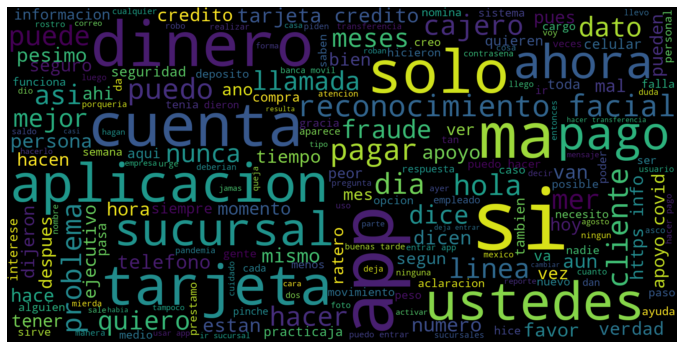

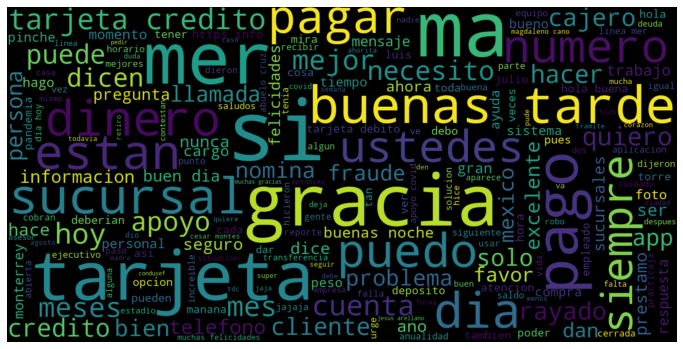

texto  sentimiento  \
0               si protegen q roban tener dinero seguro            0   
1     comunidad afinados si quieren comunidad hagan ...            0   
2                                          funciona app            0   
3     trabajen devuelvan dinero bastante deben si saben            0   
4                                         dinero dinero            0   
...                                                 ...          ...   
5950                               uds originales debis            1   
5951  llaman siguientes numeros bloqueen 55 2158 061...            1   
5952      saben cantidad puntos mer cliente patrimonial            1   
5953  estaria padre ano cobres anualidad apoyar tarj...            1   
5954                     puedo tramitar tarjeta credito            1   

                                                 texto2  
0               si protegen q roban tener dinero seguro  
1     comunidad afinados si quieren comunidad hagan ...  
2                                          funciona app  
3     trabajen devuelvan dinero bastante deben si saben  
4                                         dinero dinero  
...                                                 ...  
5950                               uds originales debis  
5951  llaman siguientes numeros bloqueen 55 2158 061...  
5952      saben cantidad puntos mer cliente patrimonial  
5953  estaria padre ano cobres anualidad apoyar tarj...  
5954                     puedo tramitar tarjeta credito  

[5955 rows x 3 columns]

In [155]:
#Nube de palabras
texto = df[['message','pronP1']].rename(columns={'message':'texto','pronP1':'sentimiento'})

Word_Cloud(texto)

## 4. Generacion de graficas y visualizacion de algunos resultados 

In [158]:
path = r"Classified_Data.csv"
df = pd.read_csv(path,encoding = 'iso-8859-15')

In [164]:
#Agrupamos los datos popr fecha para poder ver la tendencia de los comnetarios
g = df.groupby(['fecha']).sum()

#Sacamos el total de comentrios por dia
g['Fecha_count']= pd.DataFrame(pd.value_counts(df.fecha))

#Obtenemos el cociente entre el numero de comentarios y el total de comentarios
for i in range(len(cols)):
    g[cols[i]] = g[cols[i]]/g['Fecha_count'] 

#El resultado lo pusimos en la hoja de calculo: Graficas_Muestra